In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import natsort as ns

In [2]:
#Pull dem csv in, created a partial csv, just in case I needed to test

full_df = pd.read_csv('data/full_df.csv', error_bad_lines = False, warn_bad_lines = False)

#Creation of a partial data frame in case computation became to heavy during testing

#part_df = pd.read_csv('data/full_df.csv', error_bad_lines = False, warn_bad_lines = False, nrows = 5000)

In [3]:
#All of the below was for exploration

#print(part_df)
#full_df.info()
print(full_df)

#full_df.loc['JOBID']

               JOBID     ACCOUNT      USER    REQMEM    USEDMEM      REQTIME  \
0           15925210     treviso  arabella  122880Mn  65973.49M  13-18:00:00   
1           15861126     treviso  arabella  122880Mn  67181.12M  13-18:00:00   
2           15861125     treviso  arabella  122880Mn  69111.86M  13-18:00:00   
3           16251645     treviso  arabella  122880Mn  65317.33M  13-18:00:00   
4           16251646     treviso  arabella  122880Mn  65876.11M  13-18:00:00   
...              ...         ...       ...       ...        ...          ...   
3211854   24173815_6  portabella    vennie   32768Mn  23269.08M   1-00:00:00   
3211855   24173815_7  portabella    vennie   32768Mn  20879.81M   1-00:00:00   
3211856   24173815_8  portabella    vennie   32768Mn  30042.68M   1-00:00:00   
3211857   24173815_9  portabella    vennie   32768Mn  31067.75M   1-00:00:00   
3211858  24173815_10  portabella    vennie   32768Mn  21207.96M   1-00:00:00   

            USEDTIME  NODES  CPUS   PAR

In [4]:
#full_df['PARTITION'].value_counts()

In [5]:
#part_df['STATE'].value_counts()

In [6]:
#full_df['EXITCODE'].value_counts()

In [7]:
#full_df['ACCOUNT'].value_counts()

In [8]:
#full_df['USER'].value_counts()

In [9]:
#full_df.loc[full_df['USER']=='cmslocal']

In [10]:
#full_df['NODELIST'].value_counts()

In [11]:
#Created work_df of all jobs that ended in under an hour

work_df = full_df.query('TOTAL_SEC_USED < 1921')
work_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1612777 entries, 1654 to 3211858
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   JOBID           1612777 non-null  object 
 1   ACCOUNT         1612777 non-null  object 
 2   USER            1612777 non-null  object 
 3   REQMEM          1612777 non-null  object 
 4   USEDMEM         1612777 non-null  object 
 5   REQTIME         1612777 non-null  object 
 6   USEDTIME        1612777 non-null  object 
 7   NODES           1612777 non-null  int64  
 8   CPUS            1612777 non-null  int64  
 9   PARTITION       1612777 non-null  object 
 10  EXITCODE        1612777 non-null  object 
 11  STATE           1612777 non-null  object 
 12  NODELIST        1612777 non-null  object 
 13  TOTAL_SEC_USED  1612777 non-null  int64  
 14  REQMEM_IDEN     1612777 non-null  object 
 15  REQMEM_NUM      1612777 non-null  float64
 16  USEDMEM_NUM     1612777 non-null 

In [12]:
#Exploration code

#work_df.head(5)

In [13]:
#Exploration code to make sure, longest job is 1,205 seconds 

work_df['STATE'].value_counts(ascending=True)

CANCELLED by 686562          1
CANCELLED by 503585          1
CANCELLED by 546080          1
CANCELLED by 781109          1
CANCELLED by 785271          1
CANCELLED by 199066          1
CANCELLED by 337422          1
CANCELLED by 515423          1
CANCELLED by 649319          1
CANCELLED by 199766          1
CANCELLED by 483348          1
CANCELLED by 124006          1
CANCELLED by 666860          2
CANCELLED by 90423           2
CANCELLED by 454080          2
CANCELLED by 397600          2
CANCELLED by 791651          2
CANCELLED by 200557          3
CANCELLED by 0               4
CANCELLED by 9206            6
CANCELLED by 505355         13
OUT_OF_MEMORY               38
CANCELLED                  455
FAILED                     594
COMPLETED              1611642
Name: STATE, dtype: int64

In [14]:
#Proper query call to create a df of cms user jobs under the two partition tags

cms_df = work_df.query('(USER == "cmspilot" or USER == "cmslocal") and (PARTITION in ["production","nogpfs"])')

In [15]:
#Proper query call to create a df of non-cms user jobs under the two partition tags

ncms_df = work_df.query('USER != "cmspilot" and USER != "cmslocal" and (PARTITION == "production" or PARTITION == "nogpfs")')

In [16]:
#Exploration and test code

cms_df['STATE'].value_counts()
#cms_df['USER'].value_counts()

COMPLETED    392298
FAILED           61
CANCELLED        48
Name: STATE, dtype: int64

In [17]:
#Exploration and test code

ncms_df['STATE'].value_counts()
#ncms_df['USER'].value_counts()

COMPLETED              1080570
FAILED                     230
CANCELLED                  225
OUT_OF_MEMORY               20
CANCELLED by 0               4
CANCELLED by 397600          2
CANCELLED by 200557          2
CANCELLED by 649319          1
CANCELLED by 483348          1
CANCELLED by 546080          1
CANCELLED by 199066          1
CANCELLED by 199766          1
CANCELLED by 515423          1
CANCELLED by 503585          1
CANCELLED by 791651          1
CANCELLED by 686562          1
CANCELLED by 781109          1
Name: STATE, dtype: int64

In [18]:
cms_df_temp = cms_df.query('EXITCODE == "0:0"')
cms_df_temp['STATE'].value_counts()

COMPLETED    392298
CANCELLED         3
Name: STATE, dtype: int64

In [19]:
#More exploration code

#cms_df.info()
#ncms_df.info()

In [20]:
#Code for checking work, ensuring operations were successful

#cms_df['NODELIST'].value_counts().head(25)
#cms_df['NODELIST'].value_counts(normalize=True)
#cms_df['PARTITION'].value_counts()


In [21]:
#Code for checking work, ensuring operations were successful

#ncms_df['NODELIST'].value_counts().head(25)
#ncms_df['NODELIST'].value_counts(normalize=True)
#ncms_df['PARTITION'].value_counts()

In [22]:
#Test code to explore the sum totals of nodes

#cms_df['NODELIST'].value_counts().sum()
#ncms_df['NODELIST'].value_counts().sum()

In [23]:
#Test code

#ncms_df.groupby('USER')['NODELIST'].value_counts().apply(lambda u: u>3000).sum()

In [24]:
#Aggregated the data frame information by node, cms and non-cms

cms_nodecount = pd.DataFrame(data=cms_df['NODELIST'].value_counts())
ncms_nodecount = pd.DataFrame(data=ncms_df['NODELIST'].value_counts())

#Reset index because because

cms_nodecount = cms_nodecount.reset_index()
ncms_nodecount = ncms_nodecount.reset_index()

#Renamed column names so I can join/merge them later on

cms_nodecount.rename(columns={'index':'NODE', 'NODELIST':'NODECOUNT'}, inplace=True)
ncms_nodecount.rename(columns={'index':'NODE', 'NODELIST':'NODECOUNT'}, inplace=True)

#Check work

#print(cms_nodecount)
#print(ncms_nodecount)

In [25]:
#Performed an outter merge of all failed nodes, both cms and non-cms

nodes_df = cms_nodecount.merge(ncms_nodecount, on='NODE', how='outer', suffixes=('_CMS','_NCMS'))

#Filled in NaN as 0 for consistency and mathematical operations

nodes_df.fillna(0, inplace=True)

#Created a column of total failed nodes, cms and non-cms

nodes_df['NODECOUNT_TOT'] = nodes_df['NODECOUNT_CMS'] + nodes_df['NODECOUNT_NCMS']
print(nodes_df)

               NODE  NODECOUNT_CMS  NODECOUNT_NCMS  NODECOUNT_TOT
0            ng1078         5618.0           196.0         5814.0
1            ng1112         5519.0           371.0         5890.0
2            ng1040         5245.0           147.0         5392.0
3            ng1027         5160.0           132.0         5292.0
4            ng1003         5125.0           203.0         5328.0
...             ...            ...             ...            ...
1087    cn[332-333]            0.0             1.0            1.0
1088  cn[1220-1221]            0.0             1.0            1.0
1089         cn[394            0.0             1.0            1.0
1090  cn[1273-1275]            0.0             1.0            1.0
1091  cn[1467-1468]            0.0             1.0            1.0

[1092 rows x 4 columns]


In [26]:
#Created Columns of the nodecount as a percentage of failed nodes

nodes_df['PERC_CMS'] = nodes_df['NODECOUNT_CMS']/nodes_df['NODECOUNT_CMS'].sum()*100
nodes_df['PERC_NCMS'] = nodes_df['NODECOUNT_NCMS']/nodes_df['NODECOUNT_NCMS'].sum()*100
nodes_df['PERC_TOT'] = nodes_df['NODECOUNT_TOT']/nodes_df['NODECOUNT_TOT'].sum()*100

#Created a column to tag whether or not a node was ever called by a CMS user for visualization later

nodes_df['CMS_TAG'] = nodes_df['NODECOUNT_CMS']>0
print(nodes_df)

               NODE  NODECOUNT_CMS  NODECOUNT_NCMS  NODECOUNT_TOT  PERC_CMS  \
0            ng1078         5618.0           196.0         5814.0  1.431677   
1            ng1112         5519.0           371.0         5890.0  1.406448   
2            ng1040         5245.0           147.0         5392.0  1.336622   
3            ng1027         5160.0           132.0         5292.0  1.314961   
4            ng1003         5125.0           203.0         5328.0  1.306042   
...             ...            ...             ...            ...       ...   
1087    cn[332-333]            0.0             1.0            1.0  0.000000   
1088  cn[1220-1221]            0.0             1.0            1.0  0.000000   
1089         cn[394            0.0             1.0            1.0  0.000000   
1090  cn[1273-1275]            0.0             1.0            1.0  0.000000   
1091  cn[1467-1468]            0.0             1.0            1.0  0.000000   

      PERC_NCMS  PERC_TOT  CMS_TAG  
0      0.01813

In [27]:
#For some reason, running the line below eliminates all False tagged rows, but 
#calling the False designation does not??????

#nodes_df.loc[nodes_df['CMS_TAG'] == True, 'CMS_TAG'] = 'Yes'

#This code properly flags the CMS tag since Seaborn did not like it

nodes_df.loc[nodes_df['CMS_TAG'] == False, 'CMS_TAG'] = 'No'
nodes_df.loc[nodes_df['CMS_TAG'] != 'No', 'CMS_TAG'] = 'Yes'
#print(nodes_df)

In [28]:
nodes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1091
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NODE            1092 non-null   object 
 1   NODECOUNT_CMS   1092 non-null   float64
 2   NODECOUNT_NCMS  1092 non-null   float64
 3   NODECOUNT_TOT   1092 non-null   float64
 4   PERC_CMS        1092 non-null   float64
 5   PERC_NCMS       1092 non-null   float64
 6   PERC_TOT        1092 non-null   float64
 7   CMS_TAG         1092 non-null   object 
dtypes: float64(6), object(2)
memory usage: 76.8+ KB


In [29]:
#Filter our nodes that have very low percentage failure rates

nodes_df.query('PERC_NCMS > 0.0015 or NODECOUNT_CMS > 1000', inplace = True)

In [30]:
#Exploration graphing was problematic as the counts between CMS and Non-CMS were very different, 
#So I created an additional tag column to to separate the two sets of data, yet retain them both
#within the same data frame

nodes_df['TAG900'] = nodes_df['NODECOUNT_CMS']>900

nodes_CMS25 = nodes_df.sort_values('PERC_CMS', ascending = False).head(25)
nodes_NCMS25 = nodes_df.sort_values('PERC_NCMS', ascending = False).head(25)

nodes_25 = pd.concat([nodes_CMS25, nodes_NCMS25])
nodes_25_nat = pd.concat([nodes_CMS25, nodes_NCMS25])

nodes_25_nat['NODE'] = pd.Categorical(nodes_25['NODE'], ordered = True, 
                                  categories = ns.natsorted(nodes_25['NODE']))

nodes_25 = nodes_25.sort_values('NODECOUNT_CMS', ascending = False)
nodes_25_nat = nodes_25_nat.sort_values('NODE', ascending = True).head(50)

print(nodes_25.head())

     NODE  NODECOUNT_CMS  NODECOUNT_NCMS  NODECOUNT_TOT  PERC_CMS  PERC_NCMS  \
0  ng1078         5618.0           196.0         5814.0  1.431677   0.018130   
1  ng1112         5519.0           371.0         5890.0  1.406448   0.034318   
2  ng1040         5245.0           147.0         5392.0  1.336622   0.013598   
3  ng1027         5160.0           132.0         5292.0  1.314961   0.012210   
4  ng1003         5125.0           203.0         5328.0  1.306042   0.018778   

   PERC_TOT CMS_TAG  TAG900  
0  0.394579     Yes    True  
1  0.399737     Yes    True  
2  0.365939     Yes    True  
3  0.359152     Yes    True  
4  0.361595     Yes    True  


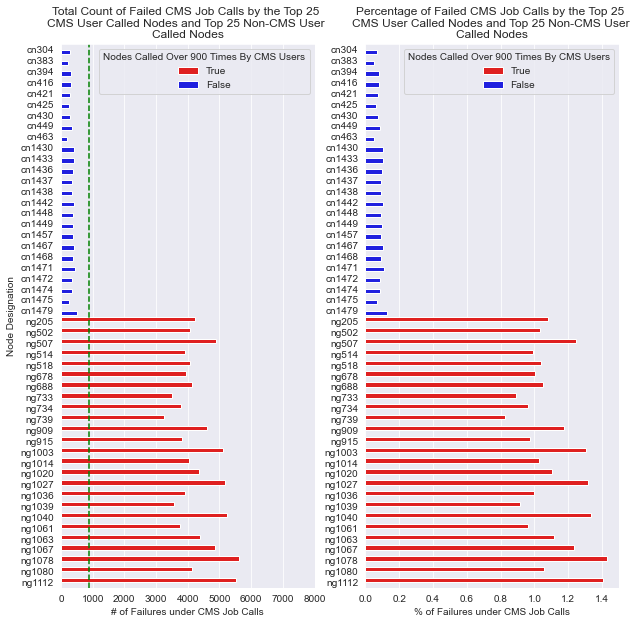

In [31]:
#Set the Seaborn style to darkgrid and the color palette to bright

sns.set_style('darkgrid')
sns.set_palette('bright')

#Creates a seaborn category plot of CMS called failures

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,10))

g0 = sns.barplot(x = 'NODECOUNT_CMS', y = 'NODE', 
            data = nodes_25_nat, ax = ax0,
            hue = 'TAG900', hue_order = [True, False],
            palette = {False : 'blue', True : 'red'})

g1 = sns.barplot(x = 'PERC_CMS', y = 'NODE', 
            data = nodes_25_nat, ax = ax1,
            hue = 'TAG900', hue_order = [True, False],
            palette = {False : 'blue', True : 'red'})

#Inserts titles, sets the x and y axis labels, and edits the titles of the legends

ax0.set_title('Total Count of Failed CMS Job Calls by the Top 25 \nCMS User Called Nodes and Top 25 Non-CMS User \nCalled Nodes')
ax0.set(xlabel = '# of Failures under CMS Job Calls', ylabel = 'Node Designation', xlim = (0,8000))
ax0.legend(title = 'Nodes Called Over 900 Times By CMS Users')
ax0.axvline(x = 900, color = 'green', label = '900 Job Calls', linestyle = '--')

ax1.set_title('Percentage of Failed CMS Job Calls by the Top 25 \nCMS User Called Nodes and Top 25 Non-CMS User \nCalled Nodes')
ax1.set(xlabel = '% of Failures under CMS Job Calls', ylabel = '', xlim = (0,1.5))
ax1.legend(title = 'Nodes Called Over 900 Times By CMS Users')

fig.savefig('cms_nat.png', dpi=150)

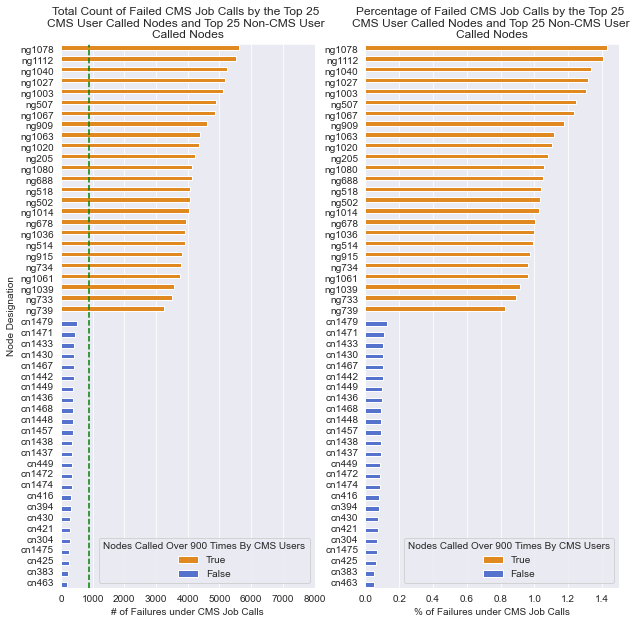

In [32]:
#Set the Seaborn style to darkgrid and the color palette to bright

sns.set_style('darkgrid')
sns.set_palette('bright')

#Creates a seaborn category plot of CMS called failures

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,10))

g0 = sns.barplot(x = 'NODECOUNT_CMS', y = 'NODE', 
            data = nodes_25, ax = ax0,
            hue = 'TAG900', hue_order = [True, False],
            palette = {False : 'royalblue', True : 'darkorange'})

g1 = sns.barplot(x = 'PERC_CMS', y = 'NODE', 
            data = nodes_25, ax = ax1,
            hue = 'TAG900', hue_order = [True, False],
            palette = {False : 'royalblue', True : 'darkorange'})

#Inserts titles, sets the x and y axis labels, and edits the titles of the legends

ax0.set_title('Total Count of Failed CMS Job Calls by the Top 25 \nCMS User Called Nodes and Top 25 Non-CMS User \nCalled Nodes')
ax0.set(xlabel = '# of Failures under CMS Job Calls', ylabel = 'Node Designation', xlim = (0,8000))
ax0.legend(title = 'Nodes Called Over 900 Times By CMS Users')
ax0.axvline(x = 900, color = 'green', label = '900 Job Calls', linestyle = '--')

ax1.set_title('Percentage of Failed CMS Job Calls by the Top 25 \nCMS User Called Nodes and Top 25 Non-CMS User \nCalled Nodes')
ax1.set(xlabel = '% of Failures under CMS Job Calls', ylabel = '', xlim = (0,1.5))
ax1.legend(title = 'Nodes Called Over 900 Times By CMS Users')

fig.savefig('cms_unordered.png', dpi=150)

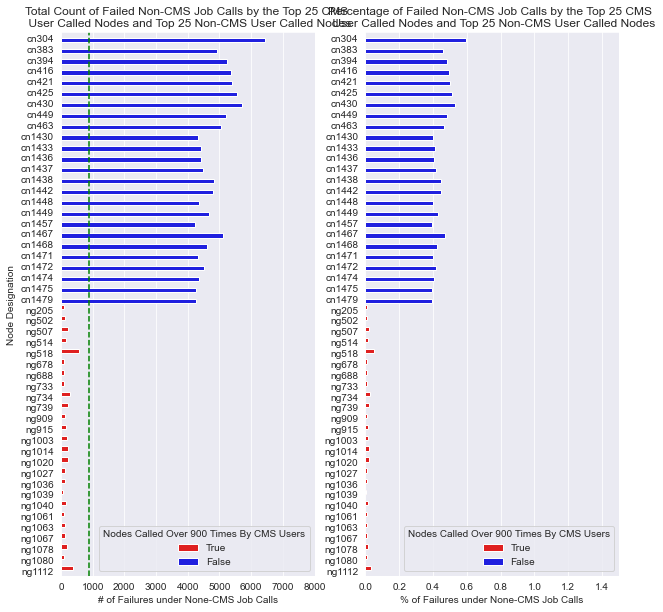

In [33]:
#Set the Seaborn style to darkgrid and the color palette to bright

sns.set_style('darkgrid')
sns.set_palette('bright')

#Creates a seaborn category plot of CMS called failures

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,10))

g0 = sns.barplot(x = 'NODECOUNT_NCMS', y = 'NODE', 
            data = nodes_25_nat, ax = ax0,
            hue = 'TAG900', hue_order = [True, False],
            palette = {False : 'blue', True : 'red'})

g1 = sns.barplot(x = 'PERC_NCMS', y = 'NODE', 
            data = nodes_25_nat, ax = ax1,
            hue = 'TAG900', hue_order = [True, False],
            palette = {False : 'blue', True : 'red'})

#Inserts titles, sets the x and y axis labels, and edits the titles of the legends

ax0.set_title('Total Count of Failed Non-CMS Job Calls by the Top 25 CMS \n User Called Nodes and Top 25 Non-CMS User Called Nodes')
ax0.set(xlabel = '# of Failures under None-CMS Job Calls', ylabel = 'Node Designation', xlim = (0,8000))
ax0.legend(title = 'Nodes Called Over 900 Times By CMS Users')
ax0.axvline(x = 900, color = 'green', label = '900 Job Calls', linestyle = '--')

ax1.set_title('Percentage of Failed Non-CMS Job Calls by the Top 25 CMS \n User Called Nodes and Top 25 Non-CMS User Called Nodes')
ax1.set(xlabel = '% of Failures under None-CMS Job Calls', ylabel = '', xlim = (0,1.5))
ax1.legend(title = 'Nodes Called Over 900 Times By CMS Users')

fig.savefig('ncms_nat.png', dpi=150)

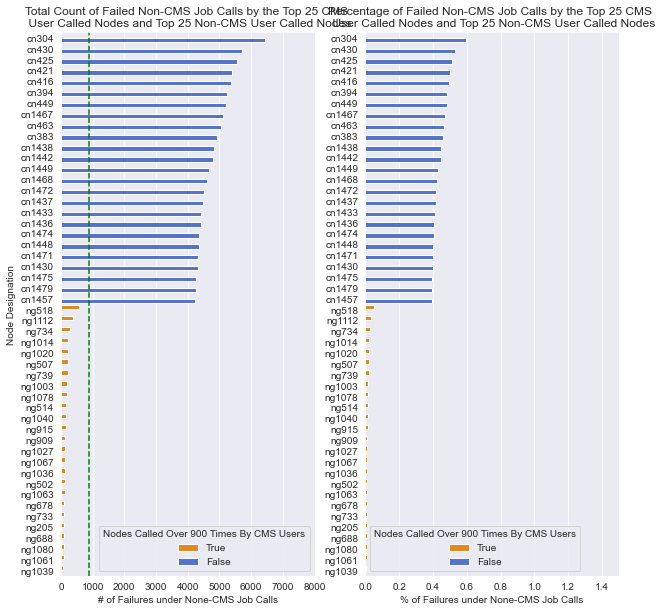

In [34]:
nodes_25 = nodes_25.sort_values('NODECOUNT_NCMS', ascending = False)

#Set the Seaborn style to darkgrid and the color palette to bright

sns.set_style('darkgrid')
sns.set_palette('bright')

#Creates a seaborn category plot of CMS called failures

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,10))

g0 = sns.barplot(x = 'NODECOUNT_NCMS', y = 'NODE', 
            data = nodes_25, ax = ax0,
            hue = 'TAG900', hue_order = [True, False],
            palette = {False : 'royalblue', True : 'darkorange'})

g1 = sns.barplot(x = 'PERC_NCMS', y = 'NODE', 
            data = nodes_25, ax = ax1,
            hue = 'TAG900', hue_order = [True, False],
            palette = {False : 'royalblue', True : 'darkorange'})

#Inserts titles, sets the x and y axis labels, and edits the titles of the legends

ax0.set_title('Total Count of Failed Non-CMS Job Calls by the Top 25 CMS \n User Called Nodes and Top 25 Non-CMS User Called Nodes')
ax0.set(xlabel = '# of Failures under None-CMS Job Calls', ylabel = 'Node Designation', xlim = (0,8000))
ax0.legend(title = 'Nodes Called Over 900 Times By CMS Users')
ax0.axvline(x = 900, color = 'green', label = '900 Job Calls', linestyle = '--')

ax1.set_title('Percentage of Failed Non-CMS Job Calls by the Top 25 CMS \n User Called Nodes and Top 25 Non-CMS User Called Nodes')
ax1.set(xlabel = '% of Failures under None-CMS Job Calls', ylabel = '', xlim = (0,1.5))
ax1.legend(title = 'Nodes Called Over 900 Times By CMS Users')

fig.savefig('ncms_unordered.png', dpi=150)

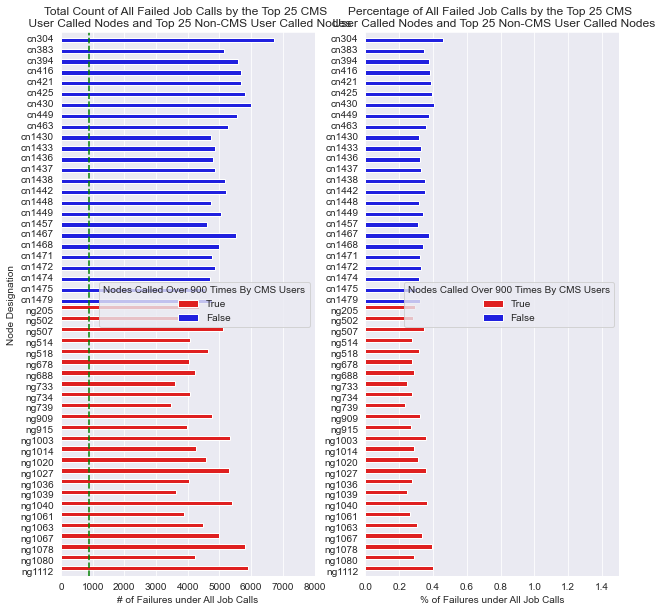

In [35]:
#Set the Seaborn style to darkgrid and the color palette to bright

sns.set_style('darkgrid')
sns.set_palette('bright')

#Creates a seaborn category plot of CMS called failures

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,10))

g0 = sns.barplot(x = 'NODECOUNT_TOT', y = 'NODE', 
            data = nodes_25_nat, ax = ax0,
            hue = 'TAG900', hue_order = [True, False],
            palette = {False : 'blue', True : 'red'})

g1 = sns.barplot(x = 'PERC_TOT', y = 'NODE', 
            data = nodes_25_nat, ax = ax1,
            hue = 'TAG900', hue_order = [True, False],
            palette = {False : 'blue', True : 'red'})

#Inserts titles, sets the x and y axis labels, and edits the titles of the legends

ax0.set_title('Total Count of All Failed Job Calls by the Top 25 CMS \n User Called Nodes and Top 25 Non-CMS User Called Nodes')
ax0.set(xlabel = '# of Failures under All Job Calls', ylabel = 'Node Designation', xlim = (0,8000))
ax0.legend(title = 'Nodes Called Over 900 Times By CMS Users')
ax0.axvline(x = 900, color = 'green', label = '900 Job Calls', linestyle = '--')

ax1.set_title('Percentage of All Failed Job Calls by the Top 25 CMS \n User Called Nodes and Top 25 Non-CMS User Called Nodes')
ax1.set(xlabel = '% of Failures under All Job Calls', ylabel = '', xlim = (0,1.5))
ax1.legend(title = 'Nodes Called Over 900 Times By CMS Users')

fig.savefig('tot_nat.png', dpi=150)

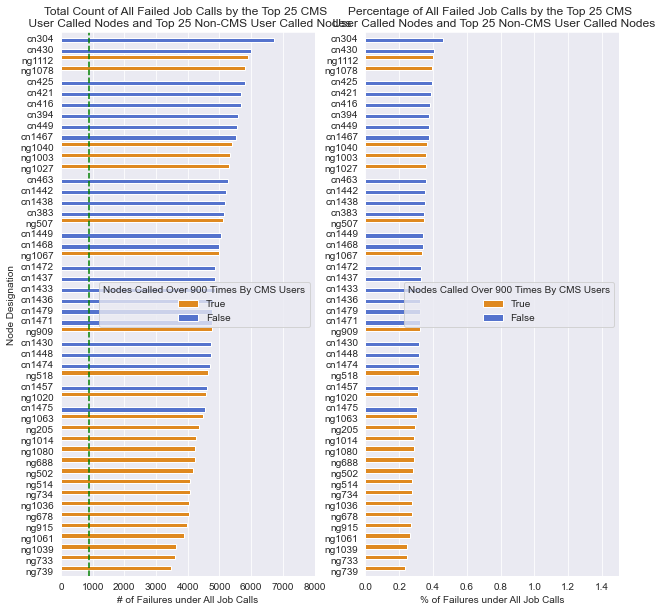

In [36]:
nodes_25 = nodes_25.sort_values('NODECOUNT_TOT', ascending = False)

#Set the Seaborn style to darkgrid and the color palette to bright

sns.set_style('darkgrid')
sns.set_palette('bright')

#Creates a seaborn category plot of CMS called failures

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,10))

g0 = sns.barplot(x = 'NODECOUNT_TOT', y = 'NODE', 
            data = nodes_25, ax = ax0,
            hue = 'TAG900', hue_order = [True, False],
            palette = {False : 'royalblue', True : 'darkorange'})

g1 = sns.barplot(x = 'PERC_TOT', y = 'NODE', 
            data = nodes_25, ax = ax1,
            hue = 'TAG900', hue_order = [True, False],
            palette = {False : 'royalblue', True : 'darkorange'})

#Inserts titles, sets the x and y axis labels, and edits the titles of the legends

ax0.set_title('Total Count of All Failed Job Calls by the Top 25 CMS \n User Called Nodes and Top 25 Non-CMS User Called Nodes')
ax0.set(xlabel = '# of Failures under All Job Calls', ylabel = 'Node Designation', xlim = (0,8000))
ax0.legend(title = 'Nodes Called Over 900 Times By CMS Users')
ax0.axvline(x = 900, color = 'green', label = '900 Job Calls', linestyle = '--')

ax1.set_title('Percentage of All Failed Job Calls by the Top 25 CMS \n User Called Nodes and Top 25 Non-CMS User Called Nodes')
ax1.set(xlabel = '% of Failures under All Job Calls', ylabel = '', xlim = (0,1.5))
ax1.legend(title = 'Nodes Called Over 900 Times By CMS Users')

fig.savefig('tot_unordered.png', dpi=150)

<img src="CMS.PNG">

<img src="NCMS.PNG">


<img src="TOT.PNG">
